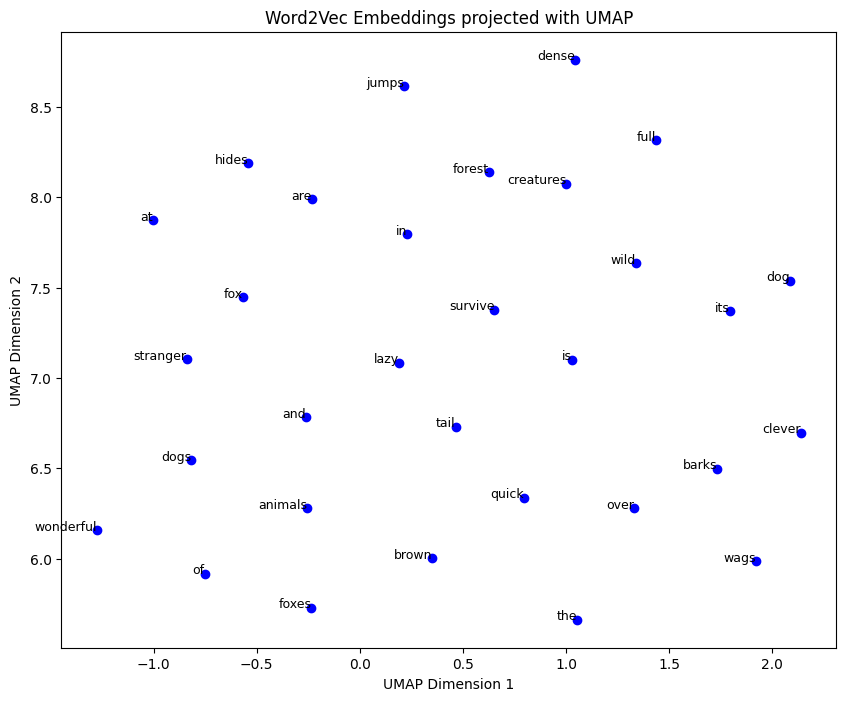

In [11]:
import gensim
from gensim.models import Word2Vec
import umap
import matplotlib.pyplot as plt

# Sample text for training a Word2Vec model
text = [
    "The quick brown fox jumps over the lazy dog",
    "The dog barks at the stranger",
    "The fox is clever and quick",
    "Dogs and foxes are animals",
    "Animals are wonderful creatures",
    "The dog wags its tail",
    "The fox hides in the forest",
    "Quick animals survive in the wild",
    "The forest is dense and full of animals",
]

# Preprocess text (split sentences into words)
sentences = [sentence.lower().split() for sentence in text]

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)

# Get word embeddings for all words in the vocabulary
words = list(word2vec_model.wv.key_to_index)
embeddings = [word2vec_model.wv[word] for word in words]

# Use UMAP to project embeddings into 2D space
umap_model = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = umap_model.fit_transform(embeddings)

# Plotting the words in 2D space
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color='blue')

# Annotate each point with the corresponding word
for i, word in enumerate(words):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], word, ha='right', fontsize=9)

plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Word2Vec Embeddings projected with UMAP")
plt.show()


In [17]:
len(words)

31

In [26]:
embeddings_2d[:,0]

array([ 1.0533434 , -0.25506398, -0.5652997 ,  2.0829706 , -0.259572  ,
        0.79639417,  0.627791  ,  0.22860835, -0.23138715,  1.0302215 ,
        0.21618427,  1.3303301 ,  2.1388807 ,  0.35205162,  1.7313116 ,
       -1.0022203 , -0.83965826,  0.19098225, -0.75175333, -0.81874454,
        1.4380709 , -1.2762891 ,  1.0006037 ,  1.9204476 ,  1.7943674 ,
        0.46415842, -0.54059243,  0.65215176,  1.3372586 ,  1.042274  ,
       -0.23526916], dtype=float32)

In [21]:
weights = [len(x) for x in words]

In [27]:
import pandas as pd

In [28]:
df = pd.DataFrame({"x":embeddings_2d[:,0],'y':embeddings_2d[:,1],'word':words,'weight':weights})

In [30]:
df.to_csv("data.csv",index=False)